In [35]:
# install rinfino with our changes
library(devtools)
devtools::install_github('maximz/rinfino@ux_changes')

Skipping install of 'rinfino' from a github remote, the SHA1 (a6abbd23) has not changed since last install.
  Use `force = TRUE` to force installation


In [4]:
library(dplyr)
library(rinfino)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Load in single origin training data provided in Rinfino

And set a clear batch name.

In [5]:
data('singleorigin_sampleinfo')
head(singleorigin_expression)

_GENE,1,2,3,4,5,6,7,8,9,⋯,54,55,56,57,58,59,60,61,62,63
A1BG,6.931783,9.0906500,8.845730,10.714400,6.973180,8.9353560,11.1556410,13.487120,7.5781249,⋯,6.909940,8.3666030,32.149354,10.055220,17.41405410,10.1872690,9.212610,12.9626980,30.194622,7.921947
A1CF,0.111335,0.1377970,0.156866,0.175503,0.247655,0.1329991,0.3822630,0.239256,0.2241850,⋯,0.649246,0.0931292,0.960148,0.192210,0.05130263,0.1729860,0.285025,0.2529780,0.097759,0.235709
A2M,3.877857,6.8295135,0.254916,0.818295,3.788256,0.5628390,1.2261610,34.624770,2.1257373,⋯,0.000000,0.0950685,4.876623,5.229988,2.58809200,1.6004200,0.519360,0.8569543,2.713120,5.879606
A2ML1,1.860813,0.9803446,1.125907,2.502954,1.818333,1.4016670,2.7568620,2.096353,0.9610550,⋯,3.005603,1.4273897,4.358749,2.404975,0.49652540,0.7400640,4.496603,1.0959655,1.677122,1.560100
A2MP1,3.441394,3.6354130,0.000000,0.000000,2.784976,0.7892310,0.0924413,33.329510,1.2134429,⋯,0.506879,0.1532770,3.368228,2.489294,2.11227700,0.0763677,0.718296,0.9741420,0.840842,1.987210
A3GALT2,0.343111,0.1971730,0.212257,0.294058,0.157224,0.0000000,0.6513290,0.525818,0.0879954,⋯,0.232693,0.3299820,3.198490,0.667014,0.37082500,0.5606910,0.902224,0.4344900,0.225765,0.139678


In [6]:
attr(singleorigin_expression, "sampleinfo")

_SAMPLE_ID,sample_id,batch,sample_name,celltype,rollup
1,1,1,1,CD4_Th2,CD4
2,2,1,2,CD8_Effector,CD8
3,3,1,3,B_CD5,B
4,4,1,4,B_Memory,B
5,5,1,5,CD4_Th1,CD4
6,6,1,6,CD4_Naive,CD4
7,7,1,7,B_Naive,B
8,8,1,8,CD8_Effector,CD8
9,9,1,9,CD4_Naive,CD4
10,10,1,10,CD4_Effector_Memory,CD4


In [7]:
attr(singleorigin_expression, "sampleinfo")$batch = 'singleorigin'

In [8]:
attr(singleorigin_expression, "sampleinfo")$batch

[1] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
 [6] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[11] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[16] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[21] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[26] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[31] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[36] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[41] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[46] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[51] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[56] "singleorigin" "singleorigin" "singleorigin" "singleorigin" "singleorigin"
[61] "singleorigin" "singleorigin" "singleorigin"

# Load in your own additional training data -- e.g. RCC TILs

We'll merge it with the default single-origin training data.

We'll also pull in celltype information from a separate file to store sample info alongside expression.

Note that this data comes in with Ensembl transcript IDs. We'll convert those to gene names.

In [9]:
rcc_tils = load_all_expdata(system.file("testdata", "rcctils_expression_matrix.tsv.gz", package = "rinfino"),
                            batch = 'rcctil')
head(rcc_tils)

Parsed with column specification:
cols(
  .default = col_double(),
  Gene_symbol = col_character()
)
See spec(...) for full column specifications.


_GENE,ERR1906199.fastq.gz,ERR1906200.fastq.gz,ERR1906201.fastq.gz,ERR1906202.fastq.gz,ERR1906203.fastq.gz,ERR1906204.fastq.gz,ERR1906205.fastq.gz,ERR1906206.fastq.gz,ERR1906207.fastq.gz,⋯,ERR1906272.fastq.gz,ERR1906273.fastq.gz,ERR1906274.fastq.gz,ERR1906275.fastq.gz,ERR1906276.fastq.gz,ERR1906277.fastq.gz,ERR1906278.fastq.gz,ERR1906279.fastq.gz,ERR1906280.fastq.gz,ERR1906281.fastq.gz
ENST00000390374,0,0,0,0.000000,0,0,0,0.0000,0.0000,⋯,20.556256,36.90824,14.20624,28.29249,5.215283,15.39861,25.75854,339.91040,382.42537,626.23112
ENST00000390375,0,0,0,0.000000,0,0,0,0.0000,0.0000,⋯,5.546267,10.02881,15.21373,15.25488,11.379331,10.91152,23.82094,0.00000,0.00000,0.00000
ENST00000390432,0,0,0,0.000000,0,0,0,0.0000,0.0000,⋯,12.694032,0.00000,0.00000,0.00000,6.429336,0.00000,37.24505,26.35997,19.35319,26.03103
ENST00000390433,0,0,0,6.076001,0,0,0,37.1646,107.1633,⋯,218.769449,211.35195,159.14830,308.40607,41.038400,31.41363,31.69790,1454.98136,1523.54942,2424.71451
ENST00000390434,0,0,0,0.000000,0,0,0,0.0000,0.0000,⋯,31.695270,23.29193,17.00688,16.87379,77.645578,78.98908,96.43540,44.75699,40.14022,46.85147
ENST00000390435,0,0,0,0.000000,0,0,0,0.0000,0.0000,⋯,56.318573,64.57343,110.61933,54.96532,138.547560,171.55885,188.84802,58.47472,119.39341,170.29212


In [10]:
attr(rcc_tils, "sampleinfo")

_SAMPLE_ID,sample_id,batch
ERR1906199.fastq.gz,ERR1906199.fastq.gz,rcctil
ERR1906200.fastq.gz,ERR1906200.fastq.gz,rcctil
ERR1906201.fastq.gz,ERR1906201.fastq.gz,rcctil
ERR1906202.fastq.gz,ERR1906202.fastq.gz,rcctil
ERR1906203.fastq.gz,ERR1906203.fastq.gz,rcctil
ERR1906204.fastq.gz,ERR1906204.fastq.gz,rcctil
ERR1906205.fastq.gz,ERR1906205.fastq.gz,rcctil
ERR1906206.fastq.gz,ERR1906206.fastq.gz,rcctil
ERR1906207.fastq.gz,ERR1906207.fastq.gz,rcctil
ERR1906208.fastq.gz,ERR1906208.fastq.gz,rcctil


In [11]:
# There's more detailed sample info available
data(rcctils_sampleinfo)
rcctils_sampleinfo

Source Name,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[individual],Characteristics[disease],Characteristics[organism part],Characteristics[cell type],Characteristics[phenotype],Material Type,⋯,Comment[FASTQ_URI],Protocol REF_6,Protocol REF_7,Derived Array Data File,Comment [Derived ArrayExpress FTP file],Factor Value[cell type],Factor Value[phenotype],sample_id,filename,sample_description
15_CD14+HLA,ERS1643748,SAMEA103954580,Homo sapiens,15,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/009/ERR1906199/ERR1906199.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906199,ERR1906199.fastq.gz,"CD204-negative, CD38-negative-macrophage"
15_CD14+HLA,ERS1643748,SAMEA103954580,Homo sapiens,15,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/000/ERR1906200/ERR1906200.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906200,ERR1906200.fastq.gz,"CD204-negative, CD38-negative-macrophage"
15_CD14+HLA,ERS1643748,SAMEA103954580,Homo sapiens,15,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/001/ERR1906201/ERR1906201.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906201,ERR1906201.fastq.gz,"CD204-negative, CD38-negative-macrophage"
26_CD14+HLA,ERS1643749,SAMEA103954581,Homo sapiens,26,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/002/ERR1906202/ERR1906202.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906202,ERR1906202.fastq.gz,"CD204-negative, CD38-negative-macrophage"
26_CD14+HLA,ERS1643749,SAMEA103954581,Homo sapiens,26,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/003/ERR1906203/ERR1906203.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906203,ERR1906203.fastq.gz,"CD204-negative, CD38-negative-macrophage"
26_CD14+HLA,ERS1643749,SAMEA103954581,Homo sapiens,26,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/004/ERR1906204/ERR1906204.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906204,ERR1906204.fastq.gz,"CD204-negative, CD38-negative-macrophage"
32_CD14+HLA,ERS1643750,SAMEA103954582,Homo sapiens,32,clear cell renal carcinoma,kidney,macrophage,"CD204-negative, CD38-negative",cell,⋯,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR190/005/ERR1906205/ERR1906205.fastq.gz,P-MTAB-54994,P-MTAB-65371,Immune_atlas_geneLevels_rpkm.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/data/experiment/MTAB/E-MTAB-5640/E-MTAB-5640.processed.1.zip,macrophage,"CD204-negative, CD38-negative",ERR1906205,ERR1906205.fastq.gz,"CD204-negative, CD38-negative-macrophage"
43_CD14+HLA,ERS1643751,SAMEA103954583,Homo sapiens,43,clear cell renal carcinoma,kidney,

In [12]:
# We trimmed that down to some convenient cell type name annotations
rcctil_celltypes = read.table('../data/rcctils.celltypes.tsv', sep='\t', header=T)
rcctils_sampleinfo_annot = rcctils_sampleinfo %>%
  dplyr::inner_join(rcctil_celltypes, by=c("sample_description")) %>%
  dplyr::select(filename, sample_id, celltype, rollup) %>%
  dplyr::rename(sample_id=filename, sample_name=sample_id)
rcctils_sampleinfo_annot

Warning message:
“Column `sample_description` joining character vector and factor, coercing into character vector”

sample_id,sample_name,celltype,rollup
ERR1906199.fastq.gz,ERR1906199,Macrophage CD38- CD204-,macrophage
ERR1906200.fastq.gz,ERR1906200,Macrophage CD38- CD204-,macrophage
ERR1906201.fastq.gz,ERR1906201,Macrophage CD38- CD204-,macrophage
ERR1906202.fastq.gz,ERR1906202,Macrophage CD38- CD204-,macrophage
ERR1906203.fastq.gz,ERR1906203,Macrophage CD38- CD204-,macrophage
ERR1906204.fastq.gz,ERR1906204,Macrophage CD38- CD204-,macrophage
ERR1906205.fastq.gz,ERR1906205,Macrophage CD38- CD204-,macrophage
ERR1906206.fastq.gz,ERR1906206,Macrophage CD38- CD204-,macrophage
ERR1906207.fastq.gz,ERR1906207,Macrophage CD38- CD204-,macrophage
ERR1906208.fastq.gz,ERR1906208,Macrophage CD38- CD204-,macrophage


In [13]:
# So load that in as sample info 
attr(rcc_tils, "sampleinfo") <-
  attr(rcc_tils, "sampleinfo") %>% 
  dplyr::inner_join(rcctils_sampleinfo_annot, by=c('sample_id'))

In [14]:
# Here's the result
attr(rcc_tils, "sampleinfo")

_SAMPLE_ID,sample_id,batch,sample_name,celltype,rollup
ERR1906199.fastq.gz,ERR1906199.fastq.gz,rcctil,ERR1906199,Macrophage CD38- CD204-,macrophage
ERR1906200.fastq.gz,ERR1906200.fastq.gz,rcctil,ERR1906200,Macrophage CD38- CD204-,macrophage
ERR1906201.fastq.gz,ERR1906201.fastq.gz,rcctil,ERR1906201,Macrophage CD38- CD204-,macrophage
ERR1906202.fastq.gz,ERR1906202.fastq.gz,rcctil,ERR1906202,Macrophage CD38- CD204-,macrophage
ERR1906203.fastq.gz,ERR1906203.fastq.gz,rcctil,ERR1906203,Macrophage CD38- CD204-,macrophage
ERR1906204.fastq.gz,ERR1906204.fastq.gz,rcctil,ERR1906204,Macrophage CD38- CD204-,macrophage
ERR1906205.fastq.gz,ERR1906205.fastq.gz,rcctil,ERR1906205,Macrophage CD38- CD204-,macrophage
ERR1906206.fastq.gz,ERR1906206.fastq.gz,rcctil,ERR1906206,Macrophage CD38- CD204-,macrophage
ERR1906207.fastq.gz,ERR1906207.fastq.gz,rcctil,ERR1906207,Macrophage CD38- CD204-,macrophage
ERR1906208.fastq.gz,ERR1906208.fastq.gz,rcctil,ERR1906208,Macrophage CD38- CD204-,macrophage


In [15]:
# Finally, remap gene names from ensembl transcript IDs to gene names
rcc_tils = map_gene_names(rcc_tils, ensembl_host="uswest.ensembl.org")
head(rcc_tils)

_GENE,ERR1906199.fastq.gz,ERR1906200.fastq.gz,ERR1906201.fastq.gz,ERR1906202.fastq.gz,ERR1906203.fastq.gz,ERR1906204.fastq.gz,ERR1906205.fastq.gz,ERR1906206.fastq.gz,ERR1906207.fastq.gz,⋯,ERR1906272.fastq.gz,ERR1906273.fastq.gz,ERR1906274.fastq.gz,ERR1906275.fastq.gz,ERR1906276.fastq.gz,ERR1906277.fastq.gz,ERR1906278.fastq.gz,ERR1906279.fastq.gz,ERR1906280.fastq.gz,ERR1906281.fastq.gz
A1BG,22.24062,25.38296,33.39255,54.880853,16.9293853,38.2106270,125.3420133,30.9965554,49.4655810,⋯,23.240732,51.7745980,57.379446,95.832163,30.6361674,46.150076,57.5524471,31.1517832,33.77905,59.592077
A1CF,0.00000,0.00000,0.00000,2.113885,0.1116723,0.8986861,1.5375338,0.2673112,0.1263193,⋯,0.000000,0.2869052,1.108722,1.386114,0.2998816,1.111851,0.8483374,0.6151324,0.00000,1.037253
A2M,260.96022,363.58189,493.74563,688.696208,175.3773602,465.9466232,3633.4233446,232.6305891,402.8994449,⋯,69.673517,218.1778080,224.653343,303.439472,34.7763805,38.778210,65.9760093,315.3718013,386.85153,596.262443
A2ML1,0.00000,0.00000,0.00000,4.004241,1.2135072,2.1668865,11.9978626,3.3205542,8.1636067,⋯,2.411608,1.1413662,2.754601,4.794498,4.4723126,1.575277,6.0832353,0.0000000,0.00000,1.277844
A2MP1,0.00000,0.00000,0.00000,2.222780,0.4491139,0.4479373,0.7414175,0.2752412,1.0484962,⋯,3.584114,14.6675094,18.137314,25.197380,2.1005497,0.569650,1.1513757,8.5765717,9.27503,13.266865
A3GALT2,0.00000,0.00000,0.00000,3.345116,0.8461616,5.0619591,1.0551051,0.0000000,1.0888141,⋯,0.000000,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.00000,0.000000


# Load in your test data

Load in tcga-kirc and bladder the same way. No sampleinfo. This task is just putting the raw data files in.

In [16]:
# custom name in these files for the gene column
bladder_data = load_expdata("../data/bladder.tpm.tsv", gene_col='Gene_symbols', batch="bladder")
tcgakirc_data = load_expdata("../data/tcgakirc.tpm.tsv", gene_col='Gene_symbols', batch="tcgakirc")

head(tcgakirc_data)

Parsed with column specification:
cols(
  .default = col_double(),
  Gene_symbols = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  Gene_symbols = col_character()
)
See spec(...) for full column specifications.


_GENE,X953473f4.9927.4fd4.bfee.8f5908638cc7,df66c814.1407.4899.a6e3.9c2a928e6ea0,X2bdf69ff.b6fe.48c8.ac05.74ca195c6e1d,X87c1d789.9482.442a.8b42.97bb479060e3,X4ddfd589.5a62.4149.9ccc.6a539f0b37b7,X383ba5ca.1706.4959.b543.ea87fbd367bd,d9f44b98.58b7.4ebd.a6a6.8de472bf95a8,X550af27b.de50.402f.8a81.c508e3dc6781,c81f9d5b.f58d.411d.9e1a.f919a0ef5636,⋯,X14b8d86c.2fef.4c50.8633.a84e12d81b51,X0cc91a13.32d9.4262.a33d.264096b4102c,X9bae55b1.5a27.4a9f.b376.ad1ab4fc4ee2,X6b124b2e.dce9.48ef.bedb.7a2da9cd2ff8,X3b4be095.1d76.49de.8357.f932ba5d55bb,e644640b.78d3.460a.83fa.ea475620a3f0,X01f8736a.85bc.498d.91c6.1c053c479512,e40e21de.f116.4eb1.87af.3b16797ec3b2,X19de7074.f195.47f6.81fa.6d3bf01c1685,X0153168a.39ce.47d6.b7f5.ac1e0f312245
5S_rRNA,9.9147700,15.1306720,25.363480,13.2242300,3.8693800,11.317250,4.3625100,13.6652960,4.233722,⋯,6.85767800,13.437248,9.344670,5.1972500,13.068880,4.319850,6.512180,9.392700,2.772839,17.498520
7SK,0.4119771,0.1177958,0.000000,0.1501236,0.0000000,0.344334,0.0000000,0.3944352,0.237672,⋯,0.15795870,0.280088,0.000000,0.1711976,0.489391,0.523055,0.000000,0.431138,1.700330,0.199897
A1BG,6.6117340,7.6576210,18.736413,5.5907500,0.3091635,8.832981,3.6198990,4.6723900,3.752960,⋯,30.05753200,14.985862,7.511637,4.5397100,4.106327,5.725944,4.635009,5.133269,7.756796,13.081544
A1BG-AS1,1.7698610,2.1545060,4.555689,2.7421140,0.0444035,2.860883,0.5575189,1.7800050,1.579688,⋯,9.58706300,3.340660,2.063594,0.7694760,1.055890,2.040633,1.381748,1.964373,1.997219,6.476828
A1CF,16.9146160,27.1087110,5.592854,7.2411740,5.1538733,6.403223,5.2247650,11.9075838,13.552498,⋯,0.05386815,7.079731,6.363790,1.2243512,6.665892,11.964710,10.849198,2.790016,3.062978,1.571386
A2M,955.6915003,864.3653990,480.849471,1136.8147990,226.9880320,1114.585243,456.6342150,541.8394170,863.649189,⋯,75.93325080,469.927555,413.452501,135.2045860,243.564366,809.920650,494.467648,395.922086,225.375808,1233.382494


In [17]:
# merge without any changes -- keep rows with NAs
merged_all = merge_expdata(list(singleorigin_expression, rcc_tils, bladder_data, tcgakirc_data),
                           fill=NULL, filter=NULL)
stopifnot(!is.null(attr(merged_all, "sampleinfo")))

Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [18]:
# how does the merged data look?

print(any(is.na(merged_all)))

# for sanity checking purposes, let's drop NAs in a separate object
# drop any genes that these samples didn't cover (any rows with an NA)
merged_minus_NAs <-
 merged_all %>% 
  filter_expdata(fun=function(x) {!any(is.na(x))}) 

print("Number of rows:")
print(c("Single origin: ", nrow(singleorigin_expression)))
print(c("RCC TILs: ", nrow(rcc_tils)))
print(c("Bladder: ", nrow(bladder_data)))
print(c("TCGA KIRC: ", nrow(tcgakirc_data)))
print(c("Merged: ", nrow(merged_all)))
print(c("Merged minus rows with any NAs: ", nrow(merged_minus_NAs)))

intersect_length = length(Reduce(intersect, list(
    singleorigin_expression$`_GENE`,
    rcc_tils$`_GENE`,
    bladder_data$`_GENE`,
    tcgakirc_data$`_GENE`
)))
print(c("Number of genes in the intersection of all these datasets' gene lists: ",
        intersect_length
       ))

stopifnot(intersect_length == nrow(merged_minus_NAs)) # sanity check!

head(merged_all)

[1] TRUE
[1] "Number of rows:"
[1] "Single origin: " "34832"          
[1] "RCC TILs: " "28125"     
[1] "Bladder: " "30003"    
[1] "TCGA KIRC: " "49878"      
[1] "Merged: " "61193"   
[1] "Merged minus rows with any NAs: " "21274"                           
[1] "Number of genes in the intersection of all these datasets' gene lists: "
[2] "21274"                                                                  


_GENE,1,2,3,4,5,6,7,8,9,⋯,X14b8d86c.2fef.4c50.8633.a84e12d81b51,X0cc91a13.32d9.4262.a33d.264096b4102c,X9bae55b1.5a27.4a9f.b376.ad1ab4fc4ee2,X6b124b2e.dce9.48ef.bedb.7a2da9cd2ff8,X3b4be095.1d76.49de.8357.f932ba5d55bb,e644640b.78d3.460a.83fa.ea475620a3f0,X01f8736a.85bc.498d.91c6.1c053c479512,e40e21de.f116.4eb1.87af.3b16797ec3b2,X19de7074.f195.47f6.81fa.6d3bf01c1685,X0153168a.39ce.47d6.b7f5.ac1e0f312245
A1BG,6.931783,9.0906500,8.845730,10.714400,6.973180,8.9353560,11.1556410,13.487120,7.5781249,⋯,30.05753200,14.9858620,7.5116370,4.5397100,4.1063270,5.7259440,4.6350090,5.1332690,7.7567960,13.0815440
A1CF,0.111335,0.1377970,0.156866,0.175503,0.247655,0.1329991,0.3822630,0.239256,0.2241850,⋯,0.05386815,7.0797312,6.3637900,1.2243512,6.6658917,11.9647100,10.8491981,2.7900159,3.0629780,1.5713856
A2M,3.877857,6.8295135,0.254916,0.818295,3.788256,0.5628390,1.2261610,34.624770,2.1257373,⋯,75.93325080,469.9275553,413.4525010,135.2045860,243.5643660,809.9206500,494.4676480,395.9220861,225.3758080,1233.3824940
A2ML1,1.860813,0.9803446,1.125907,2.502954,1.818333,1.4016670,2.7568620,2.096353,0.9610550,⋯,0.35849610,0.1952767,0.3704215,0.5085017,0.2115289,0.2313502,0.3921874,0.3019781,0.5238893,0.1467184
A2MP1,3.441394,3.6354130,0.000000,0.000000,2.784976,0.7892310,0.0924413,33.329510,1.2134429,⋯,0.18519880,0.3621058,0.4849824,0.3341931,0.3557898,0.4313636,0.1833290,0.2312270,0.2347212,0.7249752
A3GALT2,0.343111,0.1971730,0.212257,0.294058,0.157224,0.0000000,0.6513290,0.525818,0.0879954,⋯,0.02004140,0.0000000,0.1739700,0.0000000,0.0509319,0.0533940,0.0304376,0.0000000,0.1445400,0.1165450


We shouldn't do the filtering NAs out above when we merge all the datasets. Instead, we should carry NAs forward and then filter them after we've subselected to the batches we care about for a given experiment.

(That's because the multiple datasets will have different overlapping gene sets and we don't necessarily need to limit ourselves to the intersection of all four.)

# Process the data

Subselect for these batch combinations:

* singleorigin, rcctil, tcgakirc
* singleorigin, bladder

These combinations define the experiments we'll run. For each experiment, we perform gene filtering, PCA, batch correction, PCA again, and then extract the processed data.


## RCC experiment

In [19]:
rcc_experiment <-
  merged_all %>% # no NA rows removed yet
  filter_batch(c('singleorigin', 'rcctil', 'tcgakirc')) %>% # select the batches we want to include
  filter_expdata() %>% # default filter function: fun = function(x) {max(x)>0} (removes rows of all 0s)
  filter_expdata(fun=function(x) {!any(is.na(x))}) %>% # drop any genes that these samples didn't cover (any rows with an NA)
  # we wrote a custom filter function: return TRUE to keep a row, FALSE to discard
  filter_genes() # filter to marker genes and automatically random sample a bunch of housekeeping genes

Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 16,29,35,36,38,39,40,41,42,43,44,45,46,47,48,49,68,93,102,120,126,152,153,154,155,156,157,158,159,160,161,162,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,283,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300,301,302,303,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,329,331,332,333,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,369,370,371,372,373,374,375,37

In [20]:
nrow(rcc_experiment)

[1] 900

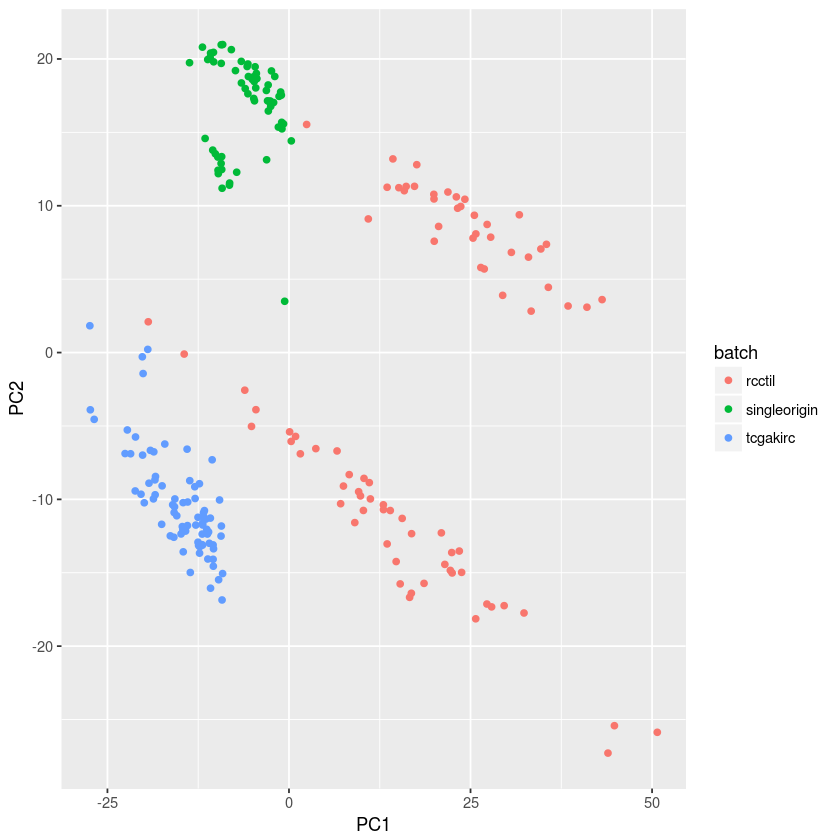

In [41]:
# run PCA before any batch correction
# this uses default transformation before PCA: log1p
throwaway = run_pca(rcc_experiment, use_ggplot = T)

In [42]:
# batch correct 
rcc_experiment_corrected <- rcc_experiment %>% run_combat()

Found 3 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


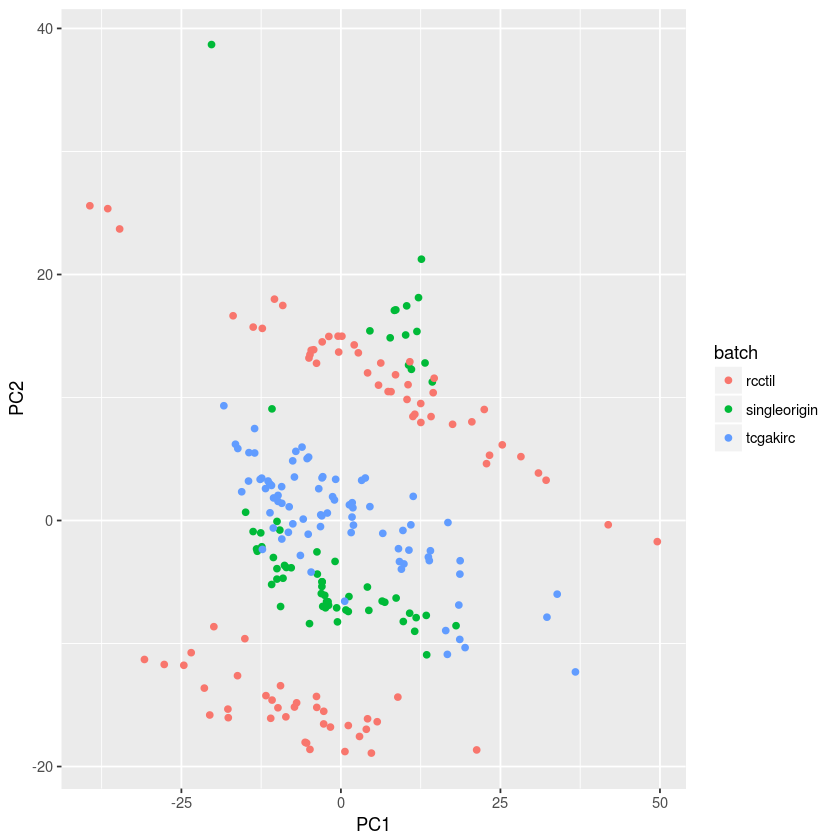

In [43]:
# PCA again
# don't use a transform (default is log1p) because combat rescaled the values.
throwaway = run_pca(rcc_experiment_corrected, trans=NULL, use_ggplot = T)


# write output

write_known_samples(rcc_experiment_corrected,
                    "out/experiment_rcc.training.expression.tsv",
                    "out/experiment_rcc.training.xdata.tsv"
                   )

write_unknown_samples(rcc_experiment_corrected,
                      "out/experiment_rcc.test.expression.tsv"
                     )


## Bladder

Warning message in data.row.names(row.names, rowsi, i):
“some row.names duplicated: 33,35,36,38,39,40,41,42,43,44,45,46,47,48,49,66,68,93,102,144,152,153,154,155,156,157,158,159,160,161,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,185,186,187,188,189,190,191,193,194,195,197,198,199,200,201,202,203,204,205,206,207,208,209,210,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,272,274,275,276,277,278,279,280,281,282,283,285,286,287,289,290,291,292,293,294,296,297,298,299,300,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,329,331,332,333,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,369,370,371,372,373,374,376,377,378,379,380,381,382,383,384,388,389,39

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


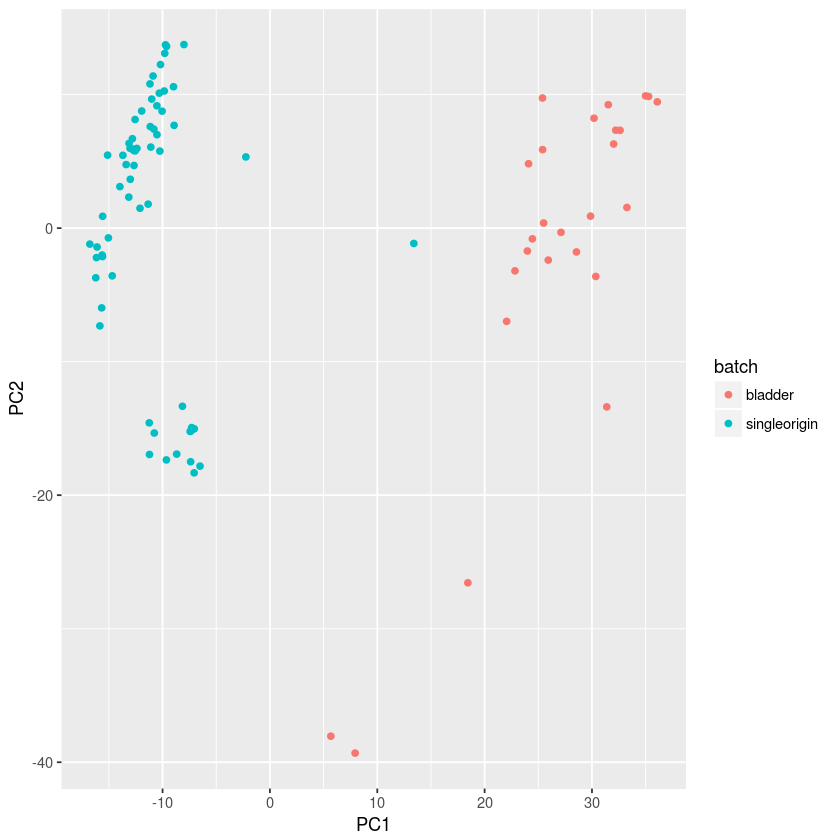

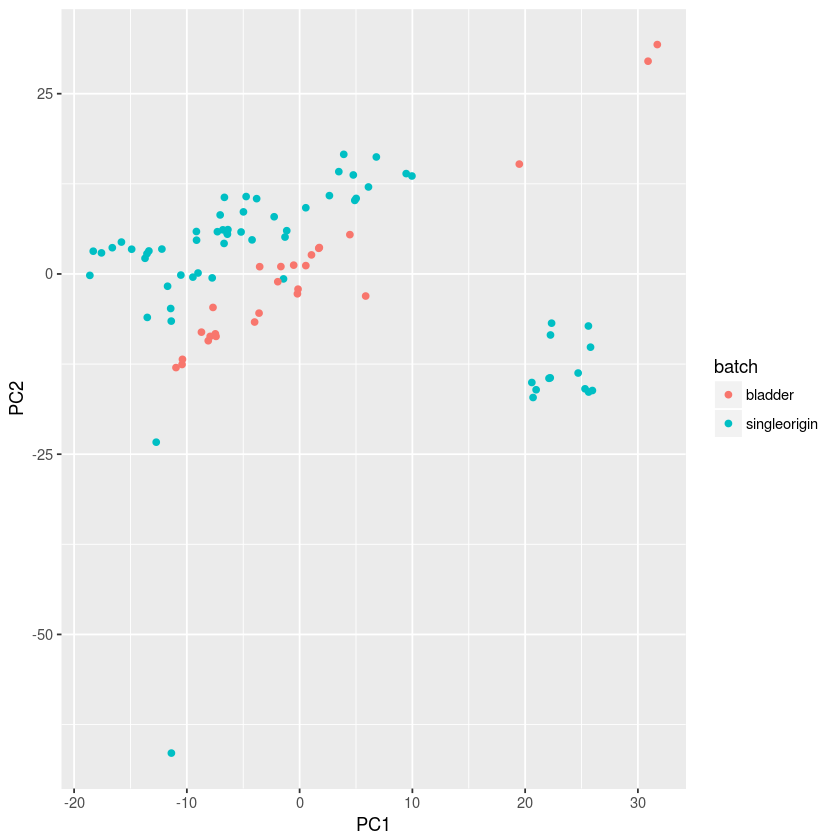

In [44]:
# extract data
bladder_experiment <-
  merged_all %>% # no NA rows removed yet
  filter_batch(c('singleorigin', 'bladder')) %>% # select the batches we want to include
  filter_expdata() %>% # default filter function: fun = function(x) {max(x)>0} (removes rows of all 0s)
  filter_expdata(fun=function(x) {!any(is.na(x))}) %>% # drop any genes that these samples didn't cover (any rows with an NA)
  # we wrote a custom filter function: return TRUE to keep a row, FALSE to discard
  filter_genes() # filter to marker genes and automatically random sample a bunch of housekeeping genes

# run PCA before any batch correction
# this uses default transformation before PCA: log1p
throwaway = run_pca(bladder_experiment, use_ggplot = T)

# batch correct 
bladder_experiment_corrected <- bladder_experiment %>% run_combat()

# PCA again
# don't use a transform (default is log1p) because combat rescaled the values.
throwaway = run_pca(bladder_experiment_corrected, trans=NULL, use_ggplot = T)

# write output
write_known_samples(bladder_experiment_corrected,
                    "out/experiment_bladder.training.expression.tsv",
                    "out/experiment_bladder.training.xdata.tsv"
                   )
write_unknown_samples(bladder_experiment_corrected,
                      "out/experiment_bladder.test.expression.tsv"
                     )
